In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor,colorbar,plot,show
%matplotlib inline

In [165]:
data=pd.read_csv('Credit_Card_Applications.csv')
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [166]:
scaler=MinMaxScaler(feature_range=(0,1))

In [167]:
X=scaler.fit_transform(X)

In [168]:
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)

In [169]:
som.random_weights_init(X)

In [170]:
som.train_random(X,100)

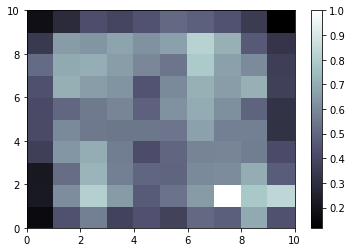

In [171]:
bone()
pcolor(som.distance_map().T)
colorbar()